## Lead Score Assignment Shanu, Ritika, Archana

### Problem Statement of Lead Score Case Study.

Final Objects
There are following objects of the Case Study

 Make a logistic regression model to assign a supereminent score between 0 and 100 to each of the leads which can be
used by the company to target implicit leads. A advanced score would mean that the lead is hot, i.e. is most likely to 
convert whereas a lower score would mean that the lead is cold and will substantially not get converted.

There are some further problems presented by the company which your model should be suitable to acclimate to if the 
company's demand changes in the future so you'll need to handle these as well. These problems are handed in a separate 
croaker train. Please fill it grounded on the logistic retrogression model you got in the first step. Also, 
make sure you include this in your final PPT where you will make recommendations.

In [1]:
# Import libraries and pass the warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and Cleaning Data

In [2]:
# Loading the data using Pandas
Dataframe = pd.read_csv('Leads.csv')
Dataframe

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


## Inspect the dataframe
### by This we can have a good idea of the dataframes.


In [3]:
# The .info() code gives almost the entire information that needs to be inspected, so let's start from there
Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
Dataframe.shape

(9240, 37)

In [5]:
Dataframe.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
Dataframe.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Now we will clean the data

### Here we will find missing values and replace with some values

In [7]:
# Will convert all values with lower case
Dataframe = Dataframe.applymap(lambda s:s.lower() if type(s) == str else s)

In [8]:
# Replacing 'Select' with NaN (Since it means no option is selected)
Dataframe = Dataframe.replace('select',np.nan)

In [9]:
# Will check nque values so that it won't affect our analysis.
Dataframe.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [10]:
# Drop cloumns having unique values
Dataframe1= Dataframe.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [11]:
# now will check percentage of missing values
round(100*(Dataframe1.isnull().sum()/len(Dataframe1.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [12]:
# Now will remove all columns having null values as 35%
Dataframe2 = Dataframe1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
Dataframe2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [13]:
# Will again check missing values
round(100*(Dataframe2.isnull().sum()/len(Dataframe2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

## Here we can see we have more missing values in some cloumns so will replacee tham by NA

In [14]:
Dataframe2['Specialization'] = Dataframe2['Specialization'].fillna('not provided') 
Dataframe2['What matters most to you in choosing a course'] = Dataframe2['What matters most to you in choosing a course'].fillna('not provided')
Dataframe2['Country'] = Dataframe2['Country'].fillna('not provided')
Dataframe2['What is your current occupation'] = Dataframe2['What is your current occupation'].fillna('not provided')
Dataframe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [15]:
# Again will check percentage of missing values
round(100*(Dataframe2.isnull().sum()/len(Dataframe2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [16]:
Dataframe2["Country"].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [17]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

Dataframe2['Country'] = Dataframe2.apply(lambda x:slots(x['Country']), axis = 1)
Dataframe2['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [18]:
# Again will check the percentage of missing values
round(100*(Dataframe2.isnull().sum()/len(Dataframe2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [19]:
Dataframe3 = Dataframe2[Dataframe2.isnull().sum(axis=1) <1]

In [20]:
# Code for checking number of rows left in percent
round(100*(Dataframe3.shape[0])/(Dataframe.shape[0]),2)

98.2

In [21]:
# will check the percentage of missing values
round(100*(Dataframe3.isnull().sum()/len(Dataframe3.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [22]:
# Print to familiarize all the categorical values
for column in Dataframe3:
    print(Dataframe3[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9074, dtype: int64
----------------------------------------------------------------------------------------
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64
----------------------------------------------------------------------------------------
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      12

In [23]:
# Removing Id values since they are unique for everyone
Dataframe_final = Dataframe3.drop('Prospect ID',1)
Dataframe_final.shape

(9074, 21)

## Exploratory Data Analysis

Here, we will perform Univariate and Bivariate analysis for both categorical and numerical variables

### Univariate Analysis

#### Categorical Variables

In [24]:
Dataframe_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

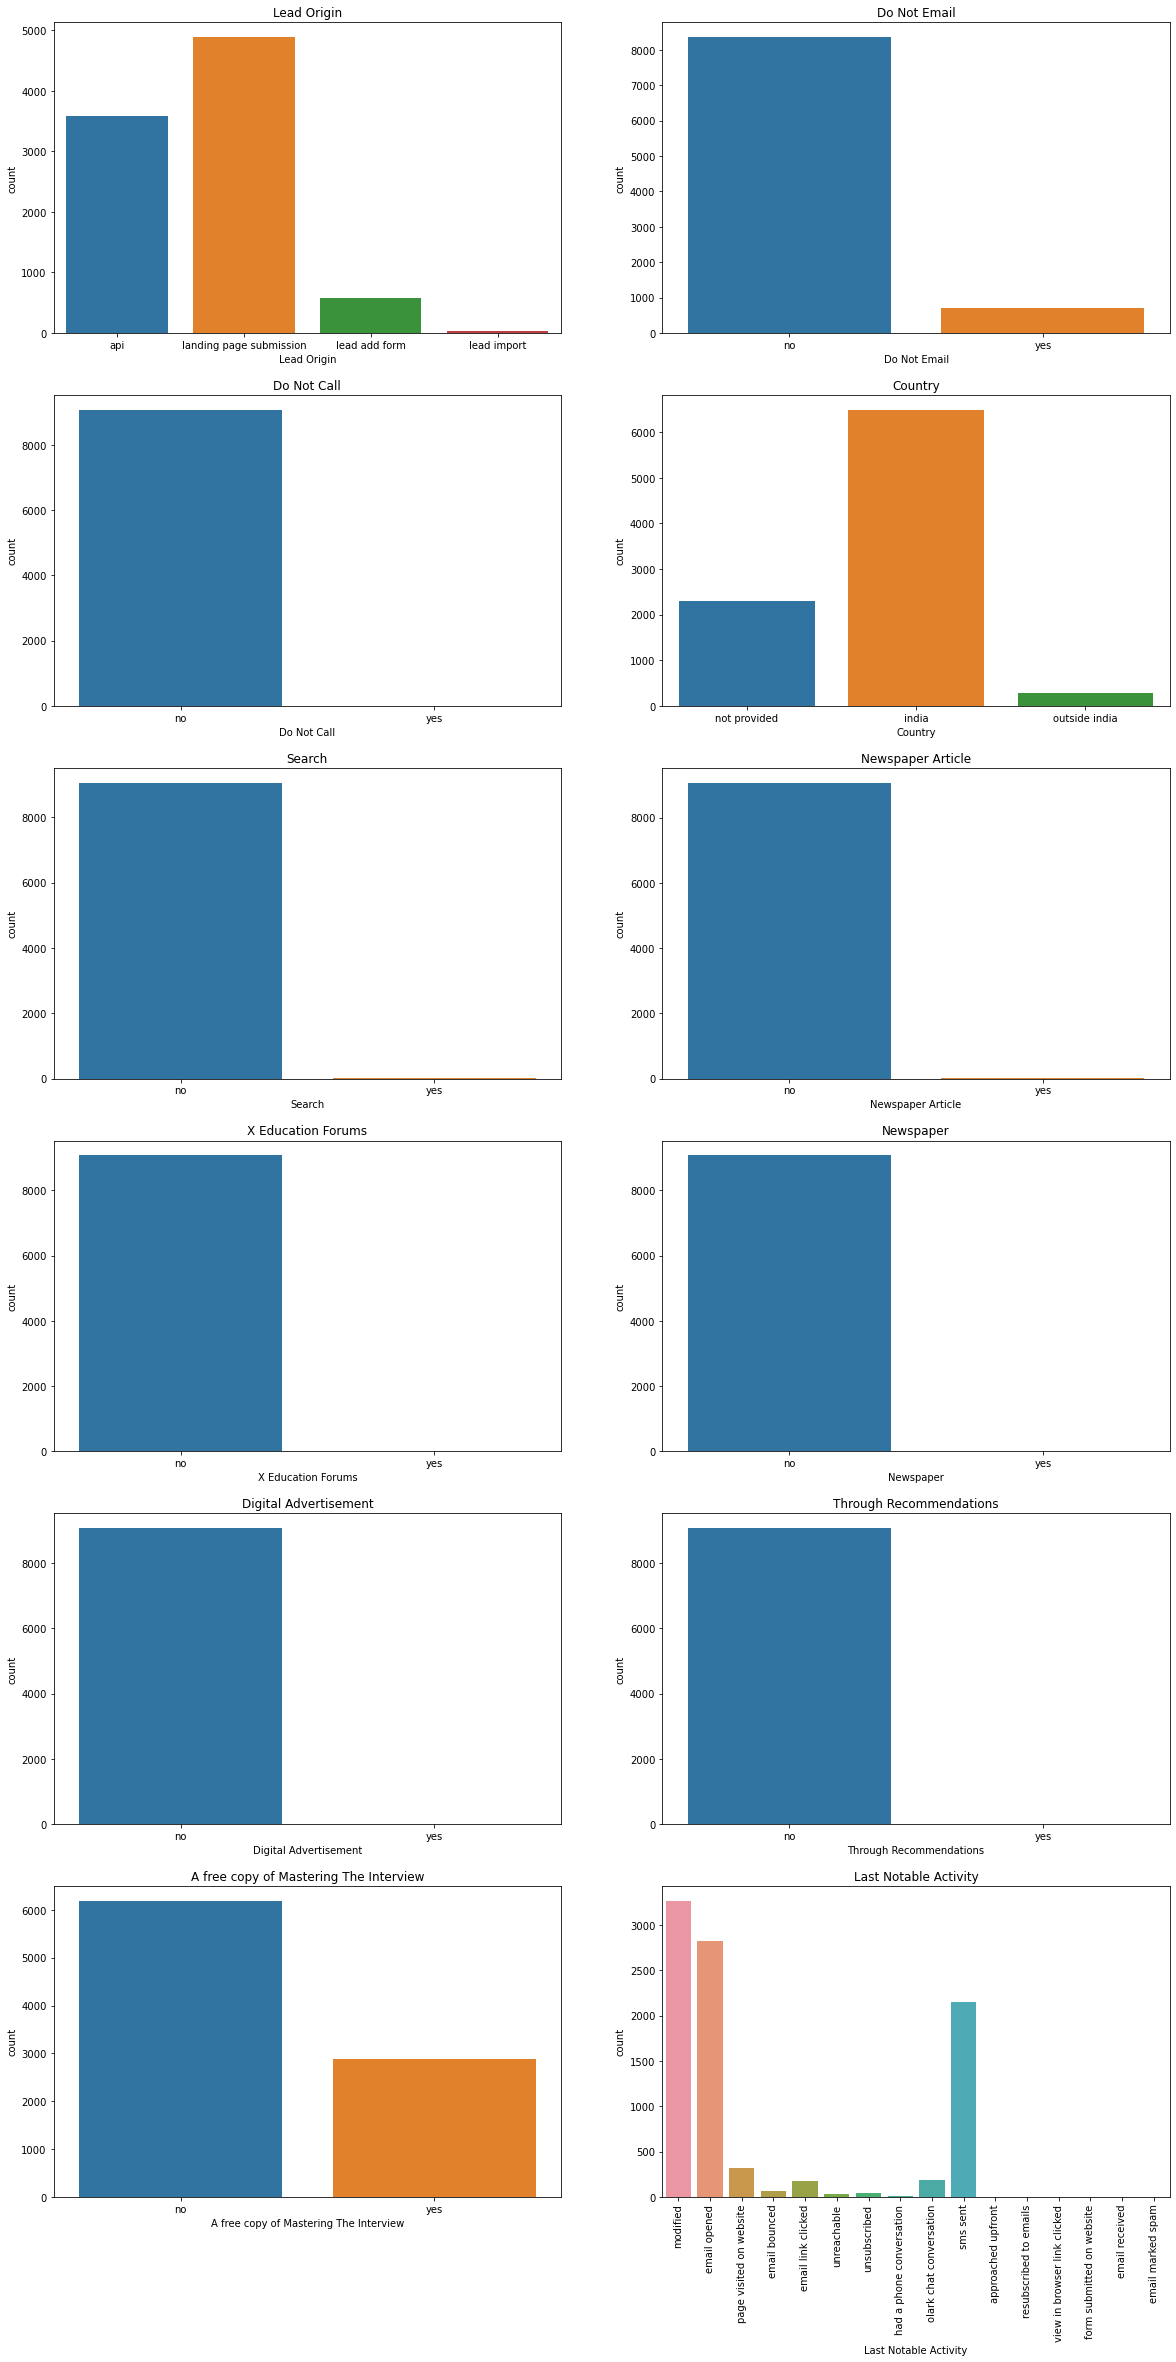

In [25]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(Dataframe_final['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(Dataframe_final['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(Dataframe_final['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(Dataframe_final['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(Dataframe_final['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(Dataframe_final['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(Dataframe_final['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(Dataframe_final['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(Dataframe_final['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(Dataframe_final['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(Dataframe_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(Dataframe_final['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

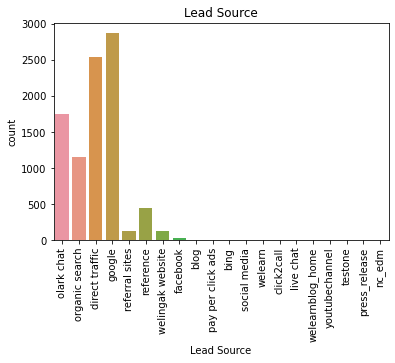

In [26]:
sns.countplot(Dataframe_final['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

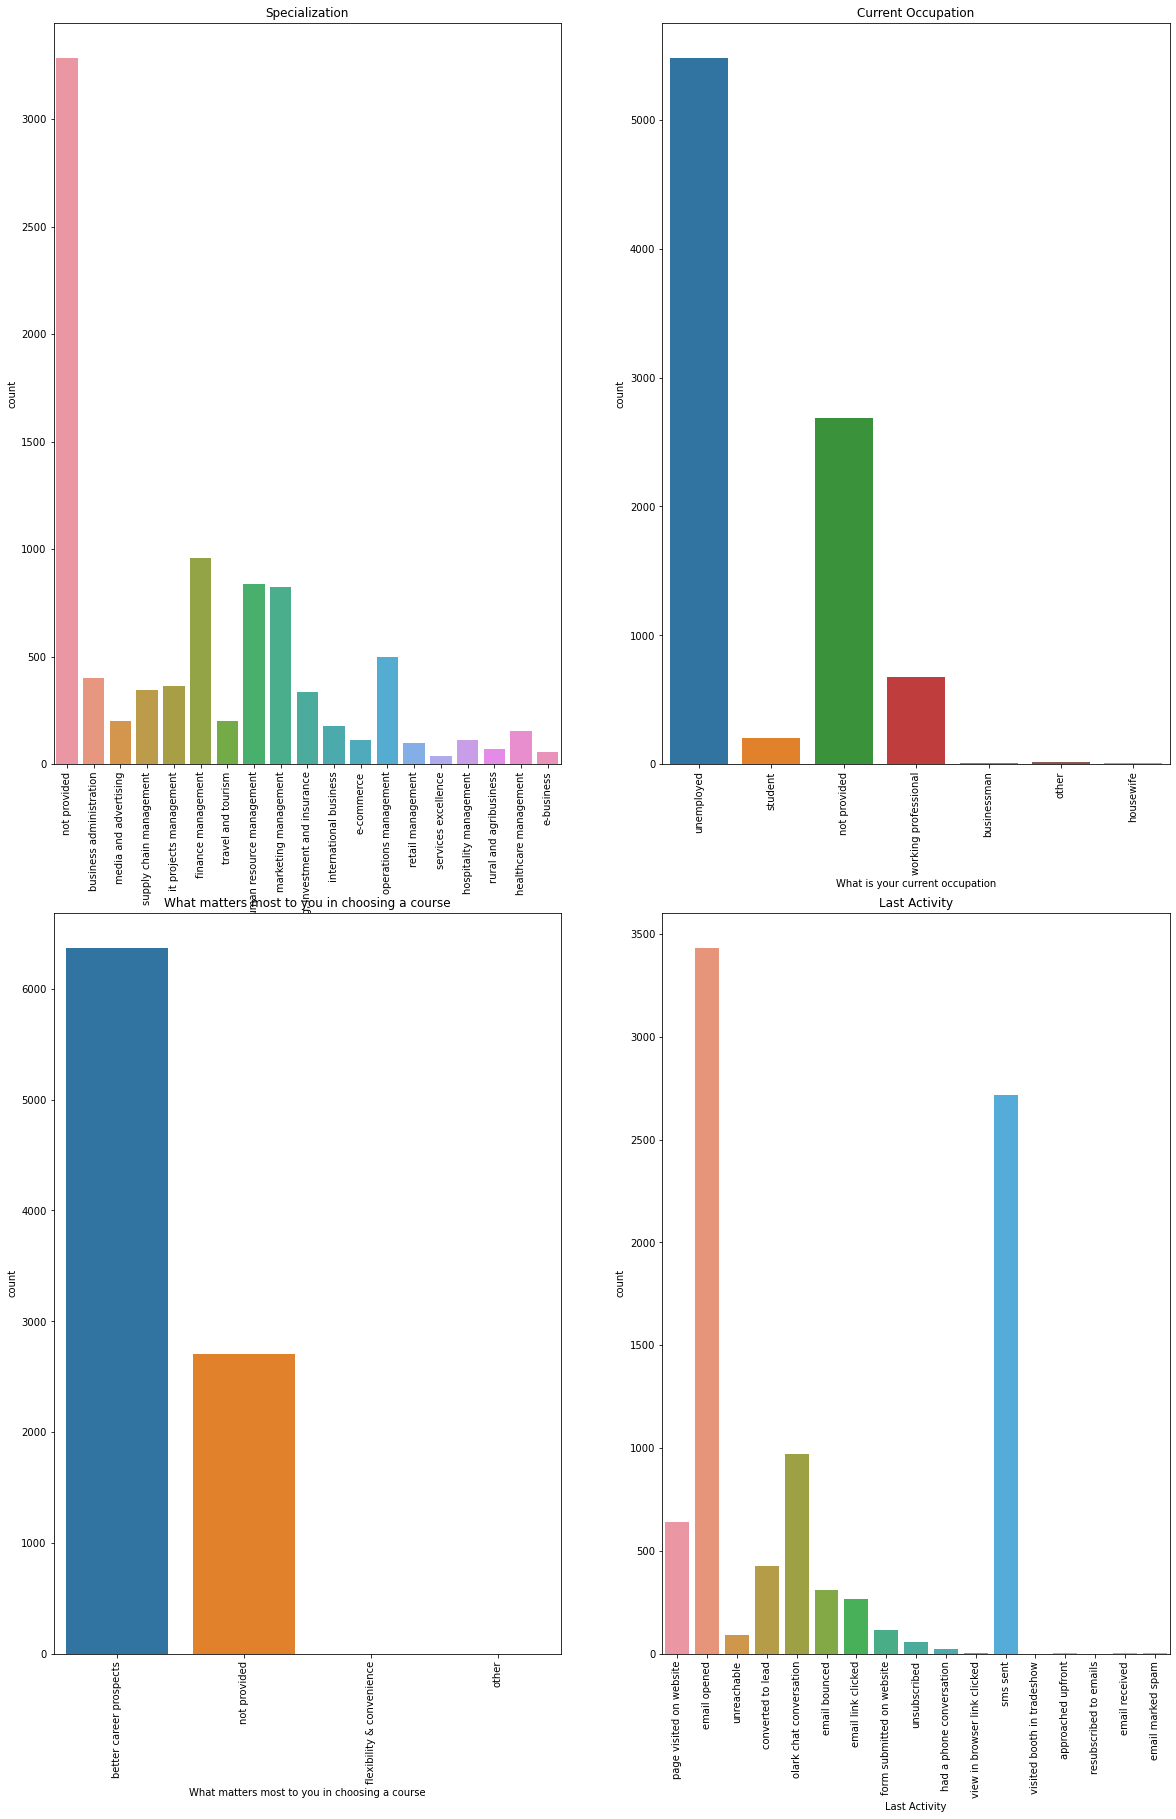

In [27]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(Dataframe_final['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(Dataframe_final['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(Dataframe_final['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(Dataframe_final['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

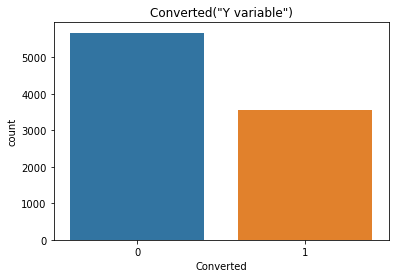

In [28]:
sns.countplot(Dataframe['Converted'])
plt.title('Converted("Y variable")')
plt.show()

### Numerical Variables

In [29]:
Dataframe_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

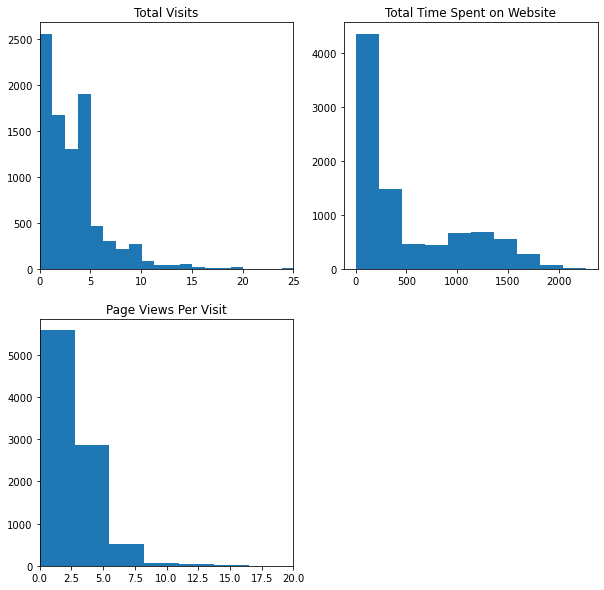

In [30]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(Dataframe_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(Dataframe_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(Dataframe_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### Relate the converted variable to categorical variables.

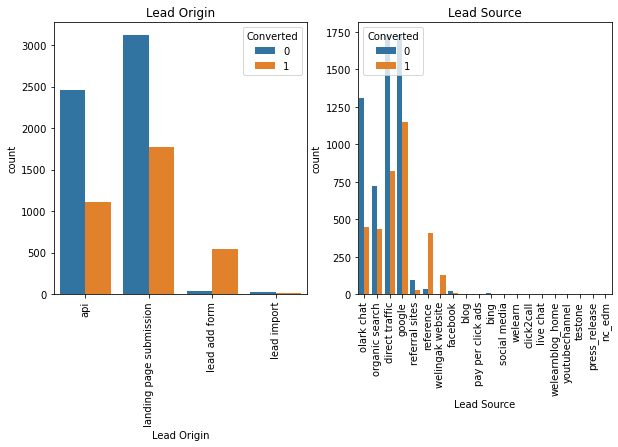

In [31]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

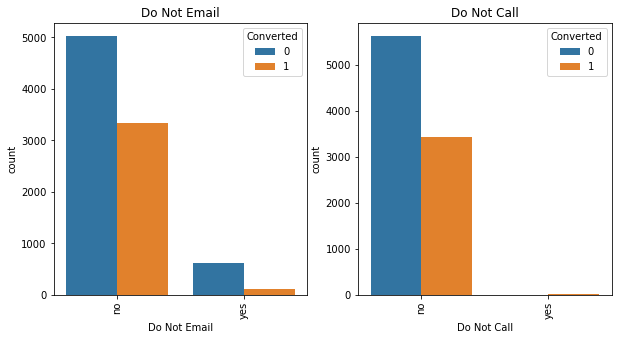

In [32]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

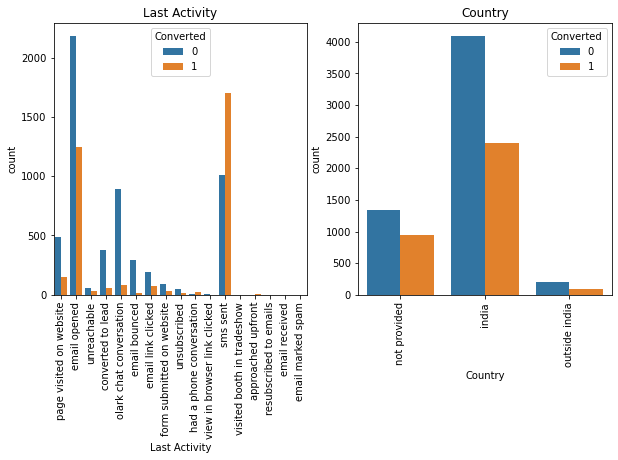

In [33]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

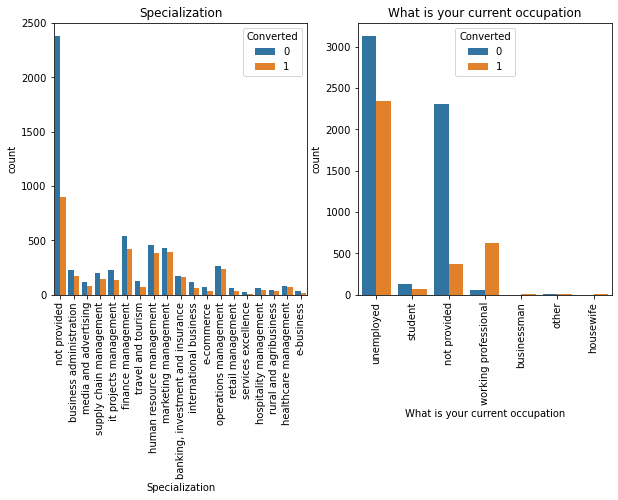

In [34]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

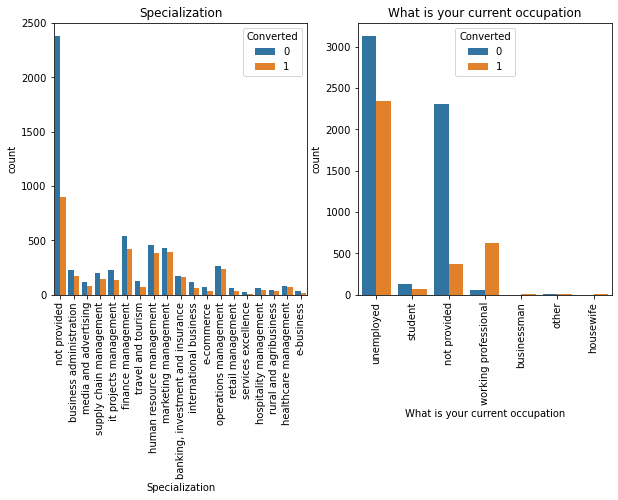

In [35]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

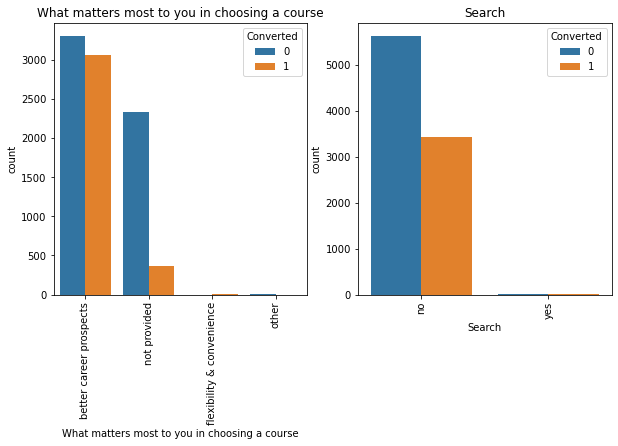

In [36]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

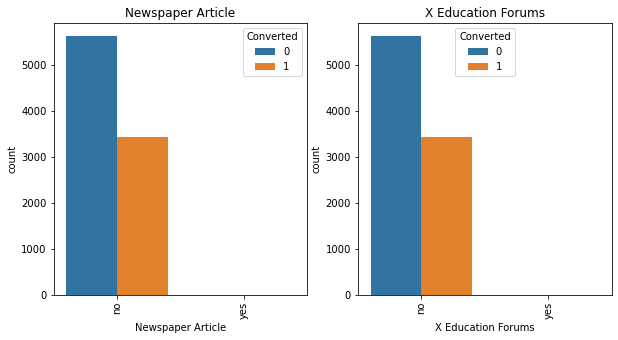

In [37]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

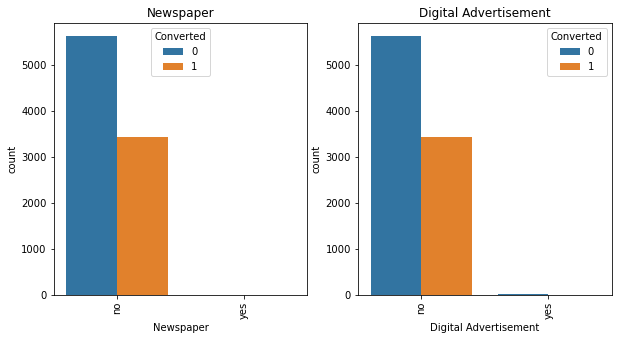

In [38]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

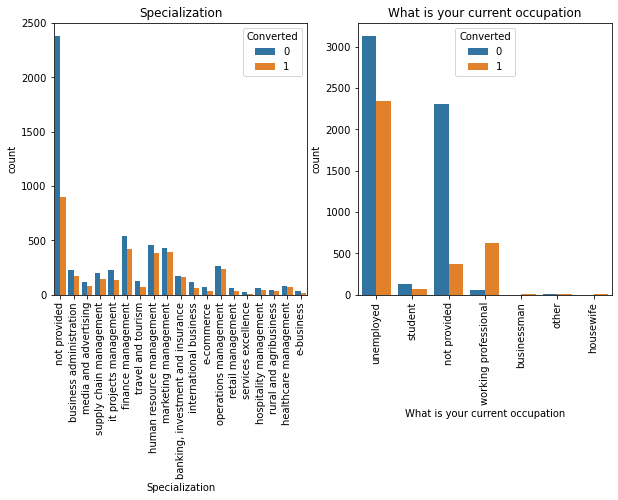

In [39]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

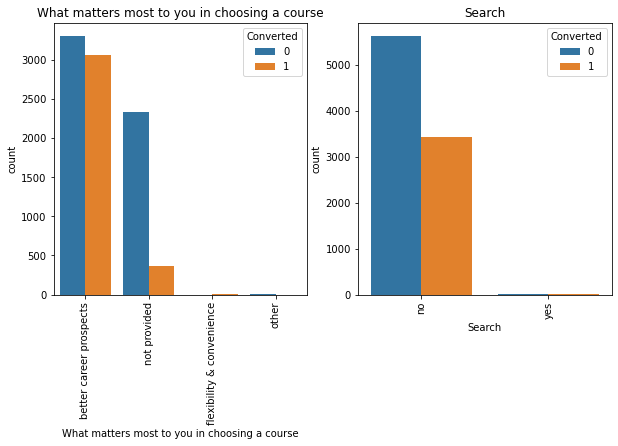

In [40]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

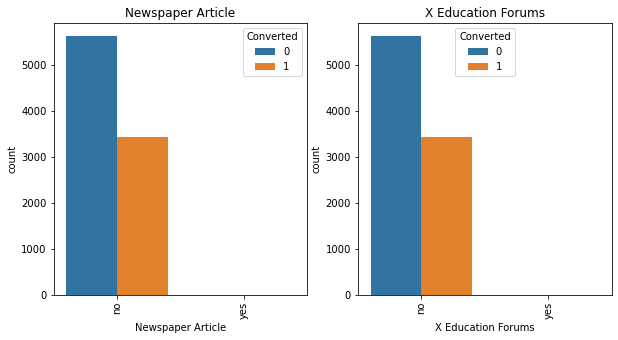

In [41]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

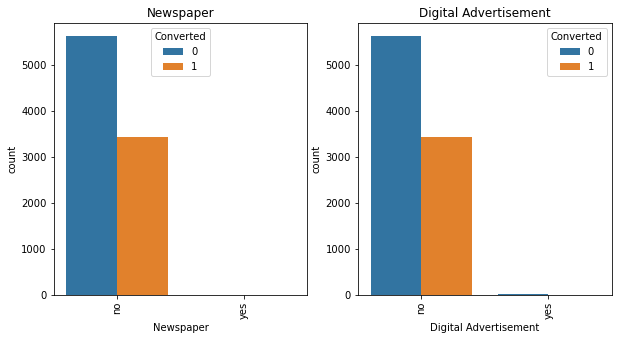

In [42]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

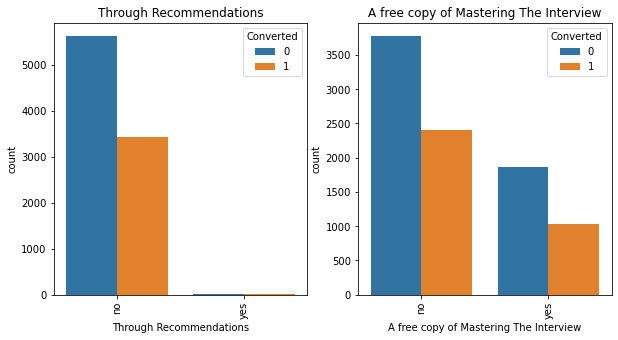

In [43]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

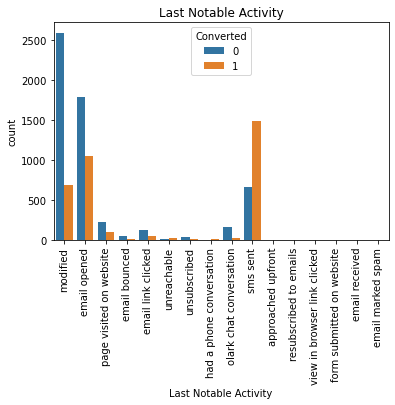

In [44]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= Dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

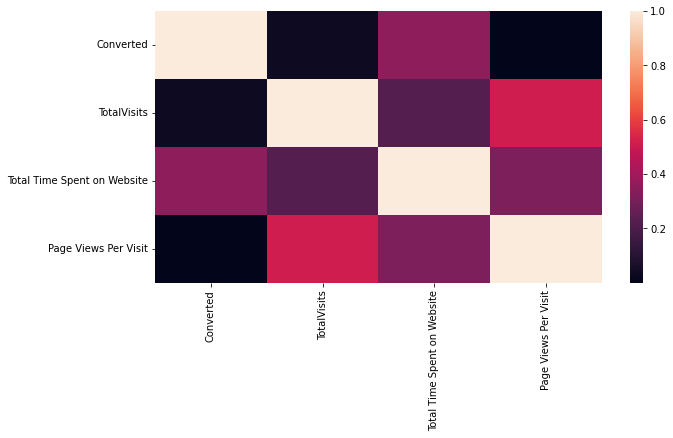

In [45]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(Dataframe_final.corr())
plt.show()

### we can see there are some elements have less data so they are less relavent to our analysis

In [46]:
numeric = Dataframe_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


### From above data wee can see there is no outlier present in the data so we will perform analysis.

## Dummy Variables

In [47]:
Dataframe_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [48]:
Dataframe_final.loc[:, Dataframe_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [49]:
# Will create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(Dataframe_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
Dataframe_final_dummy = pd.concat([Dataframe_final, dummy], axis=1)
Dataframe_final_dummy

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,outside india,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [50]:
Dataframe_final_dummy = Dataframe_final_dummy.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
Dataframe_final_dummy

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Test-Train Split

In [51]:
# Import the required library
from sklearn.model_selection import train_test_split

In [52]:
X = Dataframe_final_dummy.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [53]:
# Putting the target variable in y
y = Dataframe_final_dummy['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [54]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [55]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


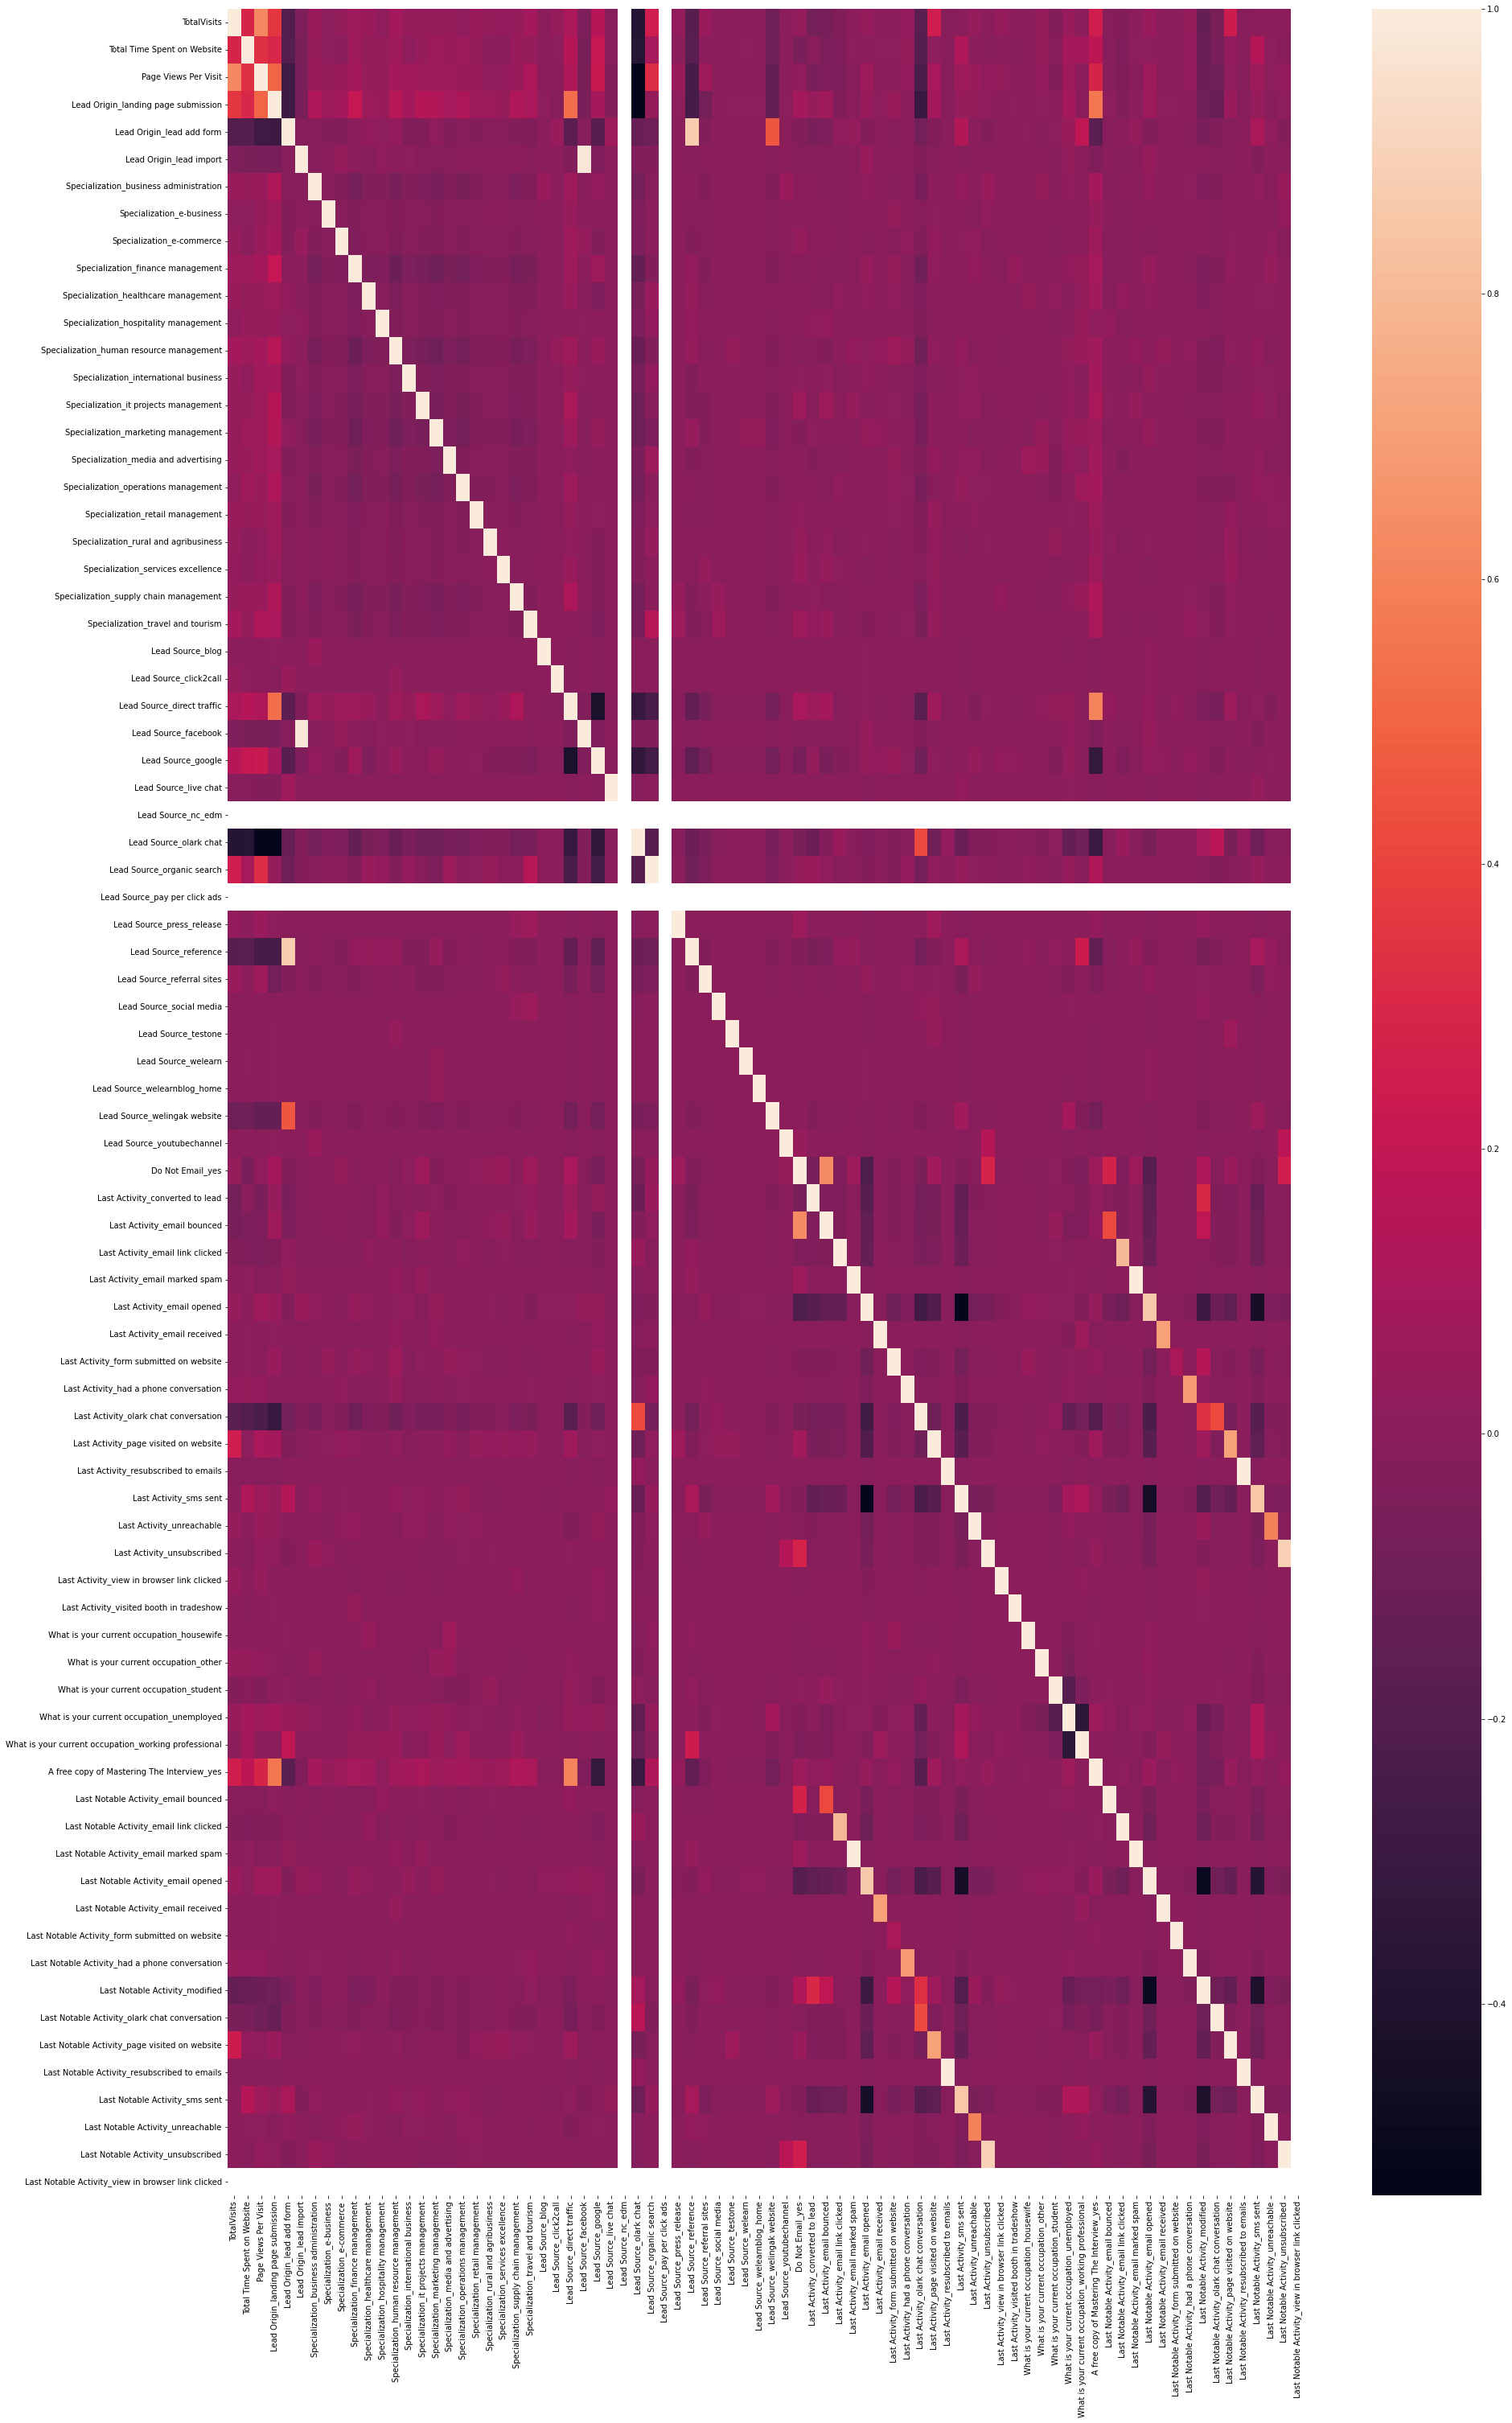

In [56]:
# To check the correlation among varibles
plt.figure(figsize=(30,50))
sns.heatmap(X_train.corr())
plt.show()

## Model Building
Now we will prepare model, evalute it

In [57]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [58]:
# Import RFE
from sklearn.feature_selection import RFE  

In [59]:
# Running RFE with 15 variables as output
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)

In [60]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_landing page submission', True, 1),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 15),
 ('Specialization_business administration', False, 8),
 ('Specialization_e-business', False, 7),
 ('Specialization_e-commerce', True, 1),
 ('Specialization_finance management', False, 5),
 ('Specialization_healthcare management', True, 1),
 ('Specialization_hospitality management', False, 20),
 ('Specialization_human resource management', False, 6),
 ('Specialization_international business', False, 12),
 ('Specialization_it projects management', False, 3),
 ('Specialization_marketing management', True, 1),
 ('Specialization_media and advertising', False, 17),
 ('Specialization_operations management', False, 2),
 ('Specialization_retail management', False, 38),
 ('Specialization_rural and agribusiness', True, 1),
 ('Specialization_services excellence',

In [61]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

### now we will find p value and vif score

In [62]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [63]:
# Importing statsmodels
import statsmodels.api as sm

In [64]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2550.3
Date:                Tue, 15 Nov 2022   Deviance:                       5100.6
Time:                        16:54:10   Pearson chi2:                 6.51e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4122
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4259      0.477     -2.990      0.003      -2.360      -0.491
TotalVisits                                              8.8377      1.994      4.432      0.000       4.930      12.746
Total Time Spent on Website                              4.6636      0.172     27.172      0.000       4.327       5.000
Page Views Per Visit                                    -2.2260      0.623     -3.571      0.000      -3.448      -1.004
Lead Origin_landing page submission                     -0.2395      0.105     -2.270      0.023      -0.446      -0.033
Lead Origin_lead add form                                0.8958      1.196      0.749      0.454      -1.448       3.239
Specialization_e-commerce                                0.4085      0.312      1.310      0.190      -0.203       1.020
Specialization_healthcare management                     0.2155      0.264      0.816      0.414      -0.302       0.733
Specialization_marketing management                      0.3528      0.121      2.909      0.004       0.115       0.591
Specialization_rural and agribusiness                    0.3686      0.412      0.895      0.371      -0.438       1.176
Specialization_services excellence                       0.5003      0.547      0.914      0.361      -0.572       1.573
Lead Source_direct traffic                              -0.8105      0.445     -1.820      0.069      -1.683       0.063
Lead Source_google                                      -0.5048      0.441     -1.145      0.252      -1.369       0.359
Lead Source_olark chat                                   0.5856      0.439      1.334      0.182      -0.275       1.446
Lead Source_organic search                              -0.6174      0.450     -1.373      0.170      -1.499       0.264
Lead Source_reference                                    1.8668      1.198      1.558      0.119      -0.482       4.215
Lead Source_referral sites                              -0.5229      0.538     -0.972      0.331      -1.578       0.532
Lead Source_social media                                 1.5272      1.534      0.996      0.319      -1.479       4.533
Lead Source_welingak website                             4.5148      1.554      2.906      0.004       1.470       7.560
Do Not Email_yes                                        -1.2775      0.208     -6.148      0.000      -1.685      -0.870
Last Activity_converted to lead                         -0.7083      0.224     -3.169      0.002      -1.146      -0.270
Last Activity_email bounced                             -0.9722      0.403     -2.411      0.016      -1.762      -0.182
Last Activity_had a phone conversation                   0

In [65]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
38,Last Notable Activity_resubscribed to emails,inf
24,Last Activity_resubscribed to emails,inf
4,Lead Origin_lead add form,83.01
14,Lead Source_reference,64.55
17,Lead Source_welingak website,19.14
10,Lead Source_direct traffic,11.01
11,Lead Source_google,11.01
33,Last Notable Activity_email opened,8.02
25,Last Activity_sms sent,6.22
12,Lead Source_olark chat,5.92


### Here we can see the VIF values seem fine but the p-values aren't. So we are removing 'Last Notable Activity had a phone conversation'

In [67]:
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

In [68]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6312
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2552.2
Date:                Tue, 15 Nov 2022   Deviance:                       5104.4
Time:                        16:54:12   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4119
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3999      0.477     -2.938      0.003      -2.334      -0.466
TotalVisits                                              8.8686      1.991      4.455      0.000       4.967      12.770
Total Time Spent on Website                              4.6573      0.172     27.150      0.000       4.321       4.994
Page Views Per Visit                                    -2.2099      0.622     -3.550      0.000      -3.430      -0.990
Lead Origin_landing page submission                     -0.2359      0.105     -2.237      0.025      -0.443      -0.029
Lead Origin_lead add form                                0.8921      1.196      0.746      0.456      -1.451       3.235
Specialization_e-commerce                                0.4001      0.311      1.285      0.199      -0.210       1.010
Specialization_healthcare management                     0.2153      0.264      0.816      0.415      -0.302       0.733
Specialization_marketing management                      0.3538      0.121      2.920      0.003       0.116       0.591
Specialization_rural and agribusiness                    0.3701      0.412      0.899      0.369      -0.437       1.177
Specialization_services excellence                       0.5022      0.547      0.917      0.359      -0.571       1.575
Lead Source_direct traffic                              -0.8174      0.445     -1.835      0.067      -1.690       0.056
Lead Source_google                                      -0.5063      0.441     -1.148      0.251      -1.370       0.358
Lead Source_olark chat                                   0.5836      0.439      1.330      0.184      -0.277       1.444
Lead Source_organic search                              -0.6289      0.450     -1.399      0.162      -1.510       0.252
Lead Source_reference                                    1.8680      1.198      1.559      0.119      -0.481       4.217
Lead Source_referral sites                              -0.5345      0.539     -0.992      0.321      -1.591       0.522
Lead Source_social media                                 1.5226      1.533      0.993      0.321      -1.482       4.528
Lead Source_welingak website                             4.5205      1.554      2.910      0.004       1.475       7.566
Do Not Email_yes                                        -1.2865      0.208     -6.195      0.000      -1.694      -0.880
Last Activity_converted to lead                         -0.7051      0.223     -3.155      0.002      -1.143      -0.267
Last Activity_email bounced                             -0.9715      0.403     -2.409      0.016      -1.762      -0.181
Last Activity_had a phone conversation                   1

In [69]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
37,Last Notable Activity_resubscribed to emails,inf
24,Last Activity_resubscribed to emails,inf
4,Lead Origin_lead add form,83.01
14,Lead Source_reference,64.55
17,Lead Source_welingak website,19.14
10,Lead Source_direct traffic,10.98
11,Lead Source_google,10.97
33,Last Notable Activity_email opened,7.98
25,Last Activity_sms sent,6.20
12,Lead Source_olark chat,5.89


In [70]:
X_train.drop('What is your current occupation_other', axis = 1, inplace = True)

In [71]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6313
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2556.5
Date:                Tue, 15 Nov 2022   Deviance:                       5113.0
Time:                        16:54:13   Pearson chi2:                 6.57e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4111
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3878      0.476     -2.915      0.004      -2.321      -0.455
TotalVisits                                              9.1540      1.992      4.596      0.000       5.250      13.058
Total Time Spent on Website                              4.6667      0.171     27.214      0.000       4.331       5.003
Page Views Per Visit                                    -2.2187      0.622     -3.567      0.000      -3.438      -1.000
Lead Origin_landing page submission                     -0.2422      0.105     -2.298      0.022      -0.449      -0.036
Lead Origin_lead add form                                0.8887      1.196      0.743      0.458      -1.456       3.234
Specialization_e-commerce                                0.3956      0.311      1.271      0.204      -0.214       1.005
Specialization_healthcare management                     0.2087      0.264      0.791      0.429      -0.308       0.726
Specialization_marketing management                      0.3729      0.121      3.083      0.002       0.136       0.610
Specialization_rural and agribusiness                    0.3654      0.412      0.888      0.375      -0.441       1.172
Specialization_services excellence                       0.4973      0.546      0.910      0.363      -0.573       1.568
Lead Source_direct traffic                              -0.8115      0.445     -1.823      0.068      -1.684       0.061
Lead Source_google                                      -0.5096      0.441     -1.157      0.247      -1.373       0.354
Lead Source_olark chat                                   0.5800      0.439      1.322      0.186      -0.280       1.440
Lead Source_organic search                              -0.6319      0.449     -1.406      0.160      -1.513       0.249
Lead Source_reference                                    1.8768      1.199      1.566      0.117      -0.473       4.226
Lead Source_referral sites                              -0.5473      0.538     -1.016      0.309      -1.603       0.508
Lead Source_social media                                 1.5081      1.533      0.984      0.325      -1.496       4.512
Lead Source_welingak website                             4.5318      1.554      2.916      0.004       1.486       7.578
Do Not Email_yes                                        -1.2892      0.208     -6.210      0.000      -1.696      -0.882
Last Activity_converted to lead                         -0.7049      0.223     -3.154      0.002      -1.143      -0.267
Last Activity_email bounced                             -0.9682      0.403     -2.400      0.016      -1.759      -0.177
Last Activity_had a phone conversation                   1

In [72]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
36,Last Notable Activity_resubscribed to emails,inf
24,Last Activity_resubscribed to emails,inf
4,Lead Origin_lead add form,83.01
14,Lead Source_reference,64.55
17,Lead Source_welingak website,19.14
11,Lead Source_google,10.97
10,Lead Source_direct traffic,10.97
32,Last Notable Activity_email opened,7.98
25,Last Activity_sms sent,6.20
12,Lead Source_olark chat,5.89


In [73]:
# <font color= green>___All the VIF values are good and all the p-values are below 0.05. So we can fix model.___</font>

## Creating Prediction

In [74]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.706192
3604    0.091742
5584    0.235743
7679    0.098953
7563    0.267691
7978    0.867122
7780    0.163873
7863    0.985868
838     0.645761
708     0.180560
dtype: float64

In [75]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.70619207, 0.0917419 , 0.23574266, 0.09895297, 0.267691  ,
       0.86712172, 0.16387309, 0.98586808, 0.64576063, 0.18055967])

In [76]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.706192
1,0,0.091742
2,0,0.235743
3,0,0.098953
4,0,0.267691


In [77]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.706192,1
1,0,0.091742,0
2,0,0.235743,0
3,0,0.098953,0
4,0,0.267691,0


## Model Evaluation

In [78]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [79]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3445,  450],
       [ 708, 1748]], dtype=int64)

In [80]:
# Predicted     not_churn    churn
# Actual
# not_churn        3403       492
# churn             729      1727

In [81]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8176665092111478

### 81% Accuracy which is a good figure.

In [82]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [83]:
# now will calculate the sensitivity
TP/(TP+FN)

0.7117263843648208

In [84]:
# will calculate the specificity
TN/(TN+FP)

0.8844672657252889

#### With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 71% and specificity of around 88%.

## Optimise Cut off (ROC Curve)

In [85]:
# ROC function
def Draw_ROC( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [86]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

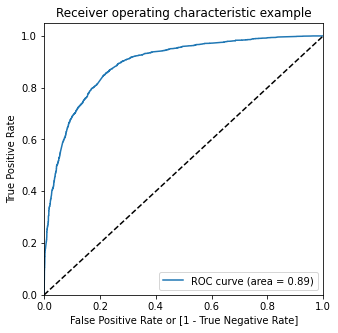

In [87]:
# Call the ROC function
Draw_ROC(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [88]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.706192,1,1,1,1,1,1,1,1,1,0,0
1,0,0.091742,0,1,0,0,0,0,0,0,0,0,0
2,0,0.235743,0,1,1,1,0,0,0,0,0,0,0
3,0,0.098953,0,1,0,0,0,0,0,0,0,0,0
4,0,0.267691,0,1,1,1,0,0,0,0,0,0,0


In [89]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.636278,0.970684,0.425417
0.2,0.2,0.771217,0.921417,0.676508
0.3,0.3,0.803810,0.870928,0.761489
0.4,0.4,0.817824,0.787459,0.836970
0.5,0.5,0.817667,0.711726,0.884467
0.6,0.6,0.811053,0.642508,0.917330
0.7,0.7,0.785231,0.528094,0.947368
0.8,0.8,0.756889,0.425081,0.966110
0.9,0.9,0.711227,0.275651,0.985879


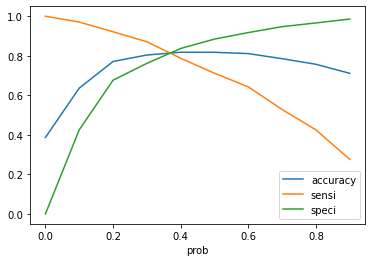

In [90]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [91]:
# <font color= green>___From the graph it is visible that the optimal cut off is at 0.37.___</font>

In [92]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.706192,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.091742,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.235743,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.098953,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.267691,0,1,1,1,0,0,0,0,0,0,0,0


In [93]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8107384663832468

In [94]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3071,  824],
       [ 378, 2078]], dtype=int64)

In [95]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [96]:
# Now will calculate the sensitivity
TP/(TP+FN)

0.8460912052117264

In [97]:
# will calculate the specificity
TN/(TN+FP)

0.7884467265725289

In [98]:
## here we can we have accuracy, sensitivity and specificity of around 80% and cut off 0.37

## Prediction on Test set

In [99]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [100]:
# Substituting all the columns in the final train model
col = X_train.columns

In [101]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Specialization_e-commerce,Specialization_healthcare management,Specialization_marketing management,Specialization_rural and agribusiness,...,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_unreachable
8308,1.0,0.035461,0.416813,0.208333,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
7212,1.0,0.028369,0.001320,0.166667,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2085,1.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4048,1.0,0.028369,0.617077,0.083333,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4790,1.0,0.028369,0.005282,0.083333,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8179,1.0,0.170213,0.148768,0.333333,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6236,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5240,1.0,0.078014,0.458627,0.229167,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [102]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.216105
1,1,0.847142
2,1,0.985868
3,1,0.884415
4,0,0.163531


In [103]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.216105,0
1,1,0.847142,1
2,1,0.985868,1
3,1,0.884415,1
4,0,0.163531,0
...,...,...,...
2718,1,0.092305,0
2719,0,0.277476,0
2720,0,0.160642,0
2721,1,0.849180,1


In [104]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8097686375321337

In [105]:
# Creating confusion matrix 
Confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
Confusion2

array([[1374,  370],
       [ 148,  831]], dtype=int64)

In [106]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [107]:
# Will calclate the sensitivity
TP/(TP+FN)

0.8460912052117264

In [108]:
# Calculating the specificity
TN/(TN+FP)

0.7884467265725289

## Precision-Recall

In [109]:
Confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
Confusion

array([[3445,  450],
       [ 708, 1748]], dtype=int64)

In [110]:
# Precision = TP / TP + FP
Confusion[1,1]/(Confusion[0,1]+Confusion[1,1])

0.7952684258416742

In [111]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7117263843648208

## Precision and Recall tradeoff

In [112]:
from sklearn.metrics import precision_recall_curve

In [113]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [114]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

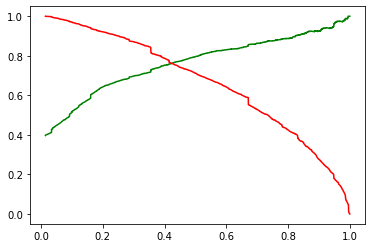

In [115]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [116]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.706192,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.091742,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.235743,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.098953,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.267691,0,1,1,1,0,0,0,0,0,0,0,0


In [117]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8171941426547

In [118]:
# Creating confusion matrix again
Confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
Confusion2

array([[3273,  622],
       [ 539, 1917]], dtype=int64)

In [119]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [120]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7160578911095796

In [121]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8460912052117264

#### we have Precision around 71% and Recall around 84% With the current cut off as 0.41

## Prediction on Test set

In [122]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.216105
1,1,0.847142
2,1,0.985868
3,1,0.884415
4,0,0.163531


In [123]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.216105,0
1,1,0.847142,1
2,1,0.985868,1
3,1,0.884415,1
4,0,0.163531,0
...,...,...,...
2718,1,0.092305,0
2719,0,0.277476,0
2720,0,0.160642,0
2721,1,0.849180,1


In [124]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8233565919941241

In [127]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1476,  268],
       [ 213,  766]], dtype=int64)

In [128]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [129]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7408123791102514

In [130]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7824310520939735